In [1]:
import os
import sys
import warnings

import pandas as pd

sys.path.append("..")

from src.pickle_manager import open_pickle
from src.evaluation import evaluate_model

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import umap
import umap.plot

/opt/conda/envs/stat_env/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [3]:
rf = open_pickle(os.path.join("..", "data", "models"), "rf_classifier_1.pkl")
lr = open_pickle(os.path.join("..", "data", "models"), "log_reg_1.pkl")
xgb = open_pickle(os.path.join("..", "data", "models"), "xgb_classifier_1.pkl")

data = open_pickle(os.path.join("..", "data", "pkls"), "processed_dataset_classification_1.pkl")
X_train, X_test, y_train, y_test = (
    data[0],
    data[1],
    data[2],
    data[3],
)

Classification Report for Logistic Regression (Train):
              precision    recall  f1-score   support

           0     0.4410    0.5770    0.4999    714399
           1     0.3876    0.3606    0.3736    889869
           2     0.4317    0.4337    0.4327   1003009
           3     0.6800    0.6098    0.6430   1120188
           4     0.9031    0.8479    0.8746    773546

    accuracy                         0.5570   4501011
   macro avg     0.5687    0.5658    0.5648   4501011
weighted avg     0.5673    0.5570    0.5600   4501011

Classification Report for Logistic Regression (Test):
              precision    recall  f1-score   support

           0     0.4413    0.5769    0.5001    178600
           1     0.3879    0.3615    0.3743    222467
           2     0.4332    0.4342    0.4337    250753
           3     0.6798    0.6110    0.6436    280047
           4     0.9029    0.8472    0.8742    193386

    accuracy                         0.5575   1125253
   macro avg     0.569

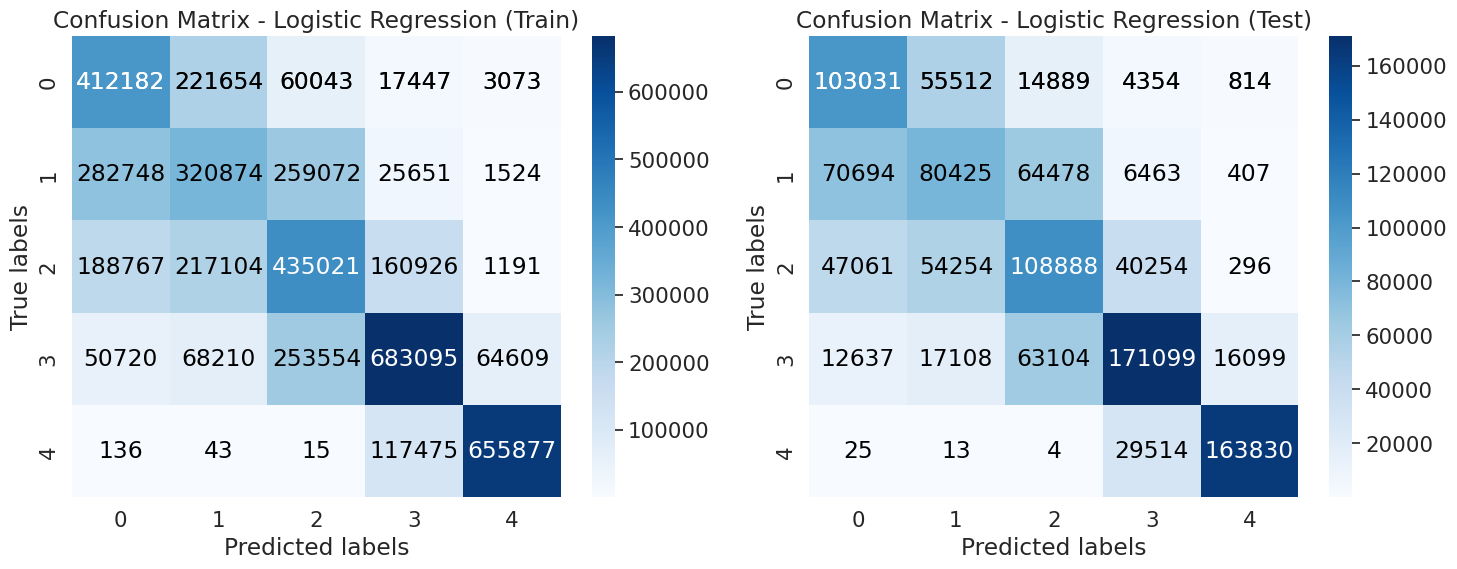

Classification Report for Random Forest (Train):
              precision    recall  f1-score   support

           0     0.9979    0.8207    0.9006    714399
           1     0.8635    0.9182    0.8900    889869
           2     0.9287    0.9647    0.9464   1003009
           3     0.9603    0.9883    0.9741   1120188
           4     0.9866    0.9852    0.9859    773546

    accuracy                         0.9421   4501011
   macro avg     0.9474    0.9354    0.9394   4501011
weighted avg     0.9446    0.9421    0.9417   4501011

Classification Report for Random Forest (Test):
              precision    recall  f1-score   support

           0     0.9978    0.8212    0.9009    178600
           1     0.8639    0.9182    0.8902    222467
           2     0.9286    0.9645    0.9462    250753
           3     0.9599    0.9879    0.9737    280047
           4     0.9862    0.9849    0.9855    193386

    accuracy                         0.9419   1125253
   macro avg     0.9473    0.9353 

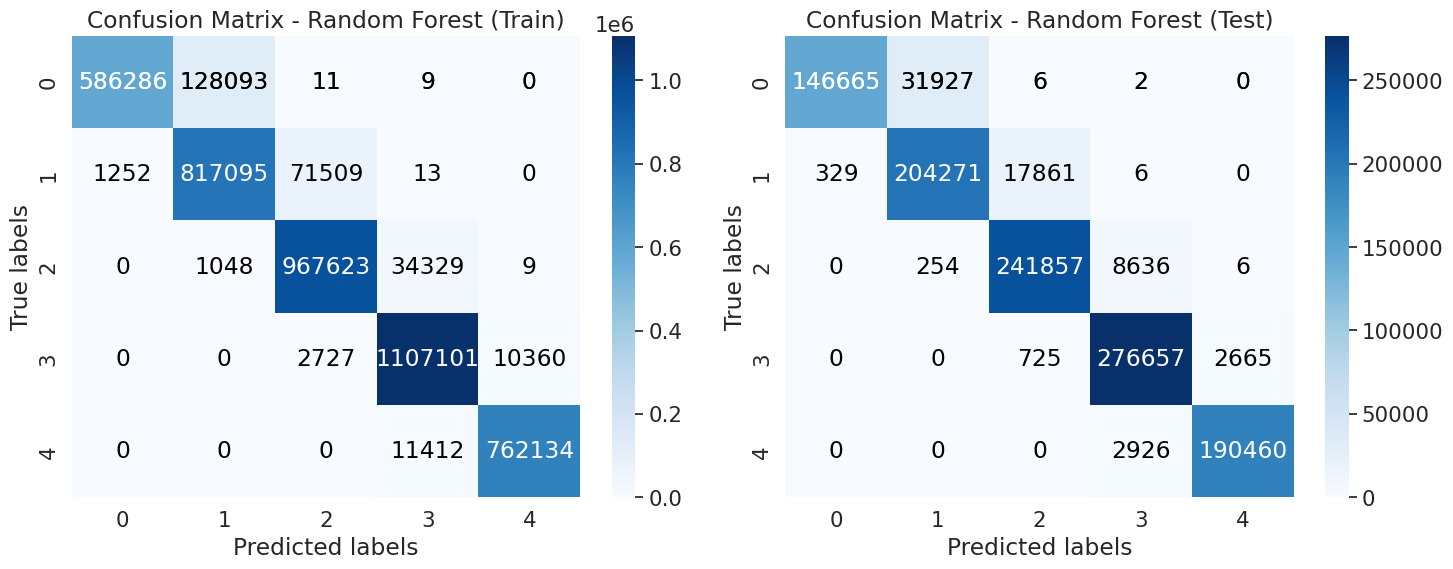

Classification Report for XGBoost (Train):
              precision    recall  f1-score   support

           0     0.9963    0.8228    0.9013    714399
           1     0.8646    0.9176    0.8903    889869
           2     0.9311    0.9642    0.9474   1003009
           3     0.9697    0.9894    0.9794   1120188
           4     0.9854    0.9999    0.9926    773546

    accuracy                         0.9450   4501011
   macro avg     0.9494    0.9388    0.9422   4501011
weighted avg     0.9472    0.9450    0.9445   4501011

Classification Report for XGBoost (Test):
              precision    recall  f1-score   support

           0     0.9960    0.8234    0.9015    178600
           1     0.8650    0.9174    0.8905    222467
           2     0.9311    0.9640    0.9473    250753
           3     0.9695    0.9892    0.9792    280047
           4     0.9850    0.9999    0.9924    193386

    accuracy                         0.9449   1125253
   macro avg     0.9493    0.9388    0.9422   

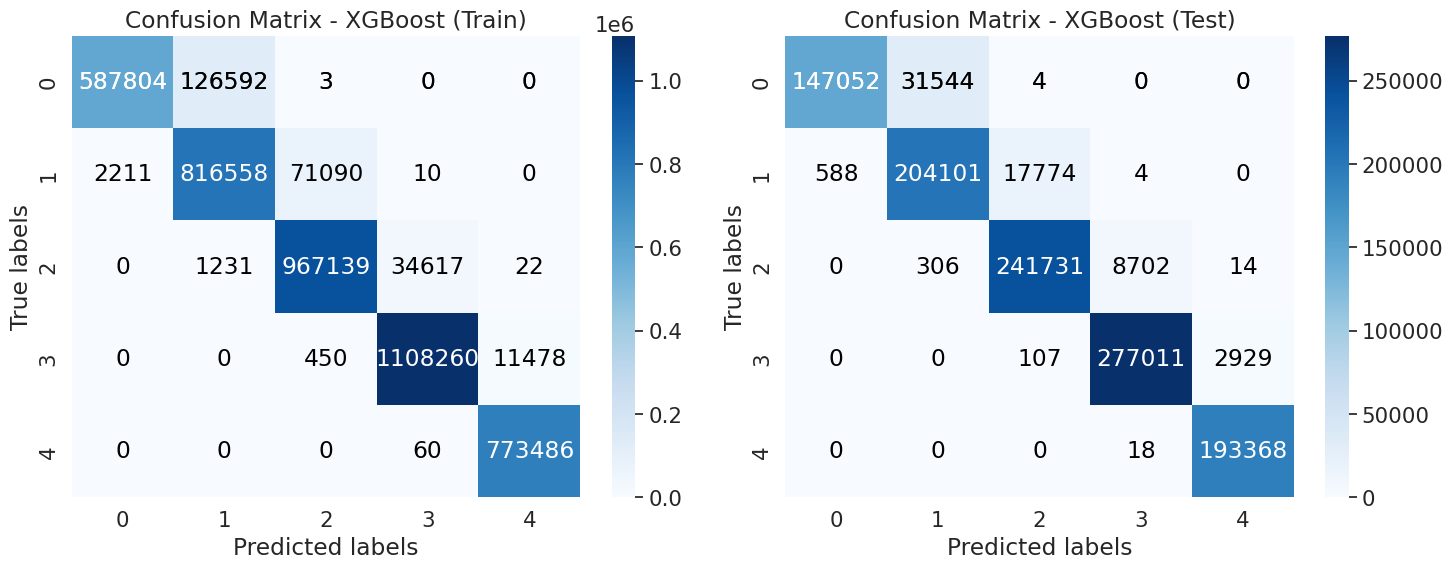

In [4]:
# Evaluate each model
for model, name in zip(
    [lr, rf, xgb], ["Logistic Regression", "Random Forest", "XGBoost"]
):
    evaluate_model(model, X_train, y_train, X_test, y_test, name)

## PCA, t-SNE & UMAP

In [5]:
# X = pd.concat([X_train, X_test], axis=0)
# y = np.concatenate([y_train, y_test], axis=0)

In [6]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test, y_test)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

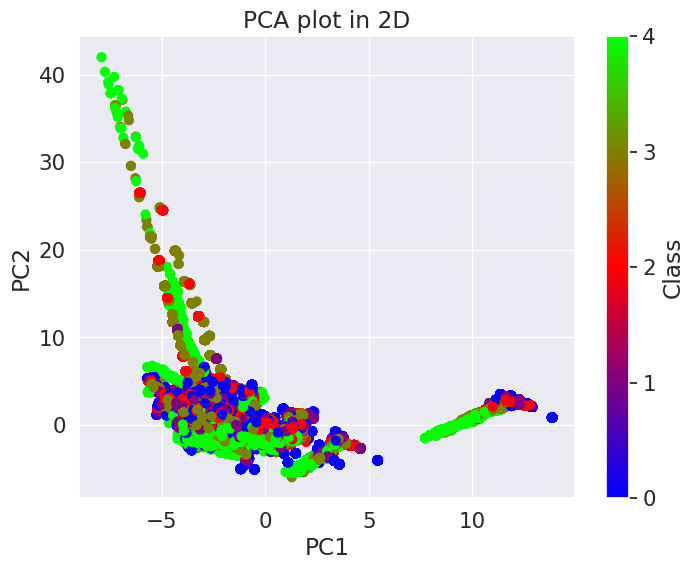

In [7]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=y_test, cmap="brg", s=40, vmin=0, vmax=4,)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar(label='Class', ticks=[0, 1, 2, 3, 4])

In [8]:
# UMAP
um = umap.UMAP()
X_umap = um.fit_transform(X_test)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

/opt/conda/envs/stat_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 563 with accuracies 
[2.68924196e-15 2.35990065e-05 3.42544811e-05 2.84862839e-05]
not reaching the requested tolerance 2.872943878173828e-05.
Use iteration 550 instead with accuracy 
2.1510211055907433e-05.

  _, diffusion_map = lobpcg(
/opt/conda/envs/stat_env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[2.60365448e-15 2.40197310e-05 3.28754137e-05 2.91456995e-05]
not reaching the requested tolerance 2.872943878173828e-05.
  _, diffusion_map = lobpcg(


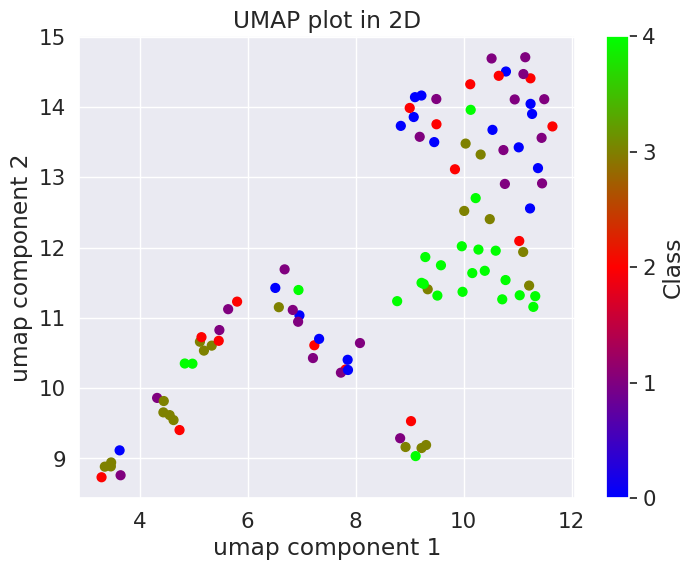

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=y_test, cmap="brg", s=40, vmin=0, vmax=4,)

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')
cbar = plt.colorbar(label='Class', ticks=[0, 1, 2, 3, 4])